Pre & post pruning

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [46]:
data = pd.read_csv("Social_Network_Ads.csv")

In [47]:
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [48]:
data = data.iloc[:, 2:]

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data["EstimatedSalary"] = ss.fit_transform(data[["EstimatedSalary"]])

In [50]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,-1.490046,0
1,35,-1.460681,0
2,26,-0.785290,0


In [51]:
x = data.iloc[:, :-1]
y = data["Purchased"]

In [52]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [55]:
dt.score(x_train , y_train)*100 , dt.score(x_test , y_test)*100 #model is overfited so in next step we will do post and pre pruning 

(99.6875, 83.75)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


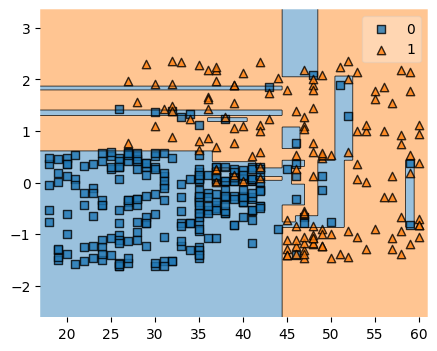

In [56]:
plt.figure(figsize = (5,4))
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf = dt)
plt.show()

In [57]:
dt1= DecisionTreeClassifier(max_depth = 5)
dt1.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5)

In [58]:
dt1.score(x_train , y_train)*100 , dt1.score(x_test , y_test)*100  #now overfiting is reduced

(93.4375, 90.0)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


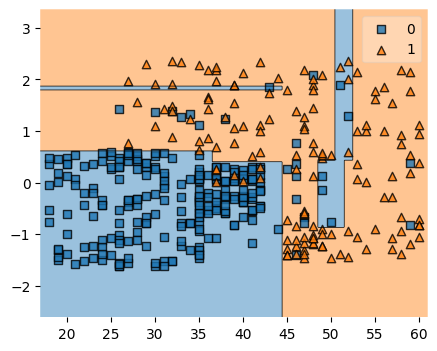

In [59]:
plt.figure(figsize = (5,4))
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf = dt1)
plt.show()

In [60]:
for i in range(1,20):
    dt2= DecisionTreeClassifier(max_depth = i)
    dt2.fit(x_train , y_train)
    print(dt2.score(x_train , y_train)*100 , dt2.score(x_test , y_test)*100 , i)
    

82.1875 90.0 1
91.875 91.25 2
91.875 91.25 3
93.125 91.25 4
93.4375 90.0 5
95.0 86.25 6
96.875 85.0 7
97.1875 85.0 8
98.125 85.0 9
98.4375 85.0 10
99.0625 83.75 11
99.375 83.75 12
99.375 83.75 13
99.6875 83.75 14
99.6875 83.75 15
99.6875 83.75 16
99.6875 83.75 17
99.6875 83.75 18
99.6875 83.75 19


In [76]:
 dt3= DecisionTreeClassifier(max_depth = 3)
 dt3.fit(x_train , y_train)
dt3.score(x_train , y_train)*100 , dt3.score(x_test , y_test)*100 
    

(91.875, 91.25)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


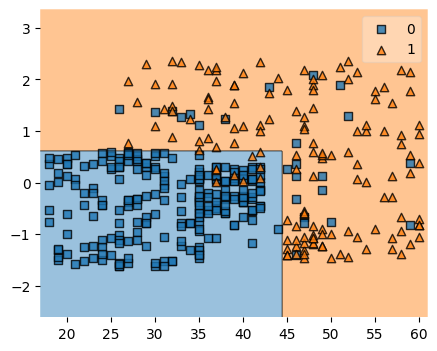

In [77]:
plt.figure(figsize = (5,4))
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf = dt3)
plt.show()

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

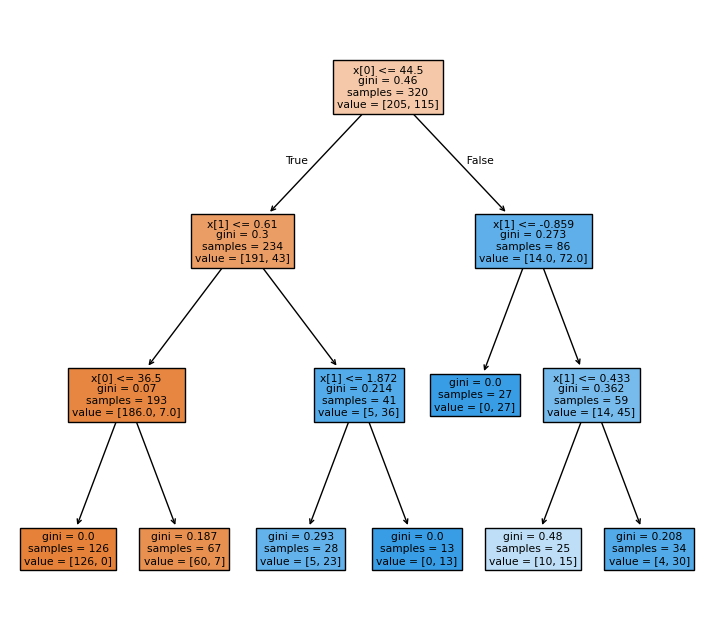

In [78]:
plt.figure(figsize=(9 , 8))
plot_tree(dt3 , filled = True)
plt.show()